<a href="https://colab.research.google.com/github/leenago/Projects/blob/master/KDX/200929_MK%EB%89%B4%EC%8A%A4%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
     |████████████████████████████████| 3.8MB 41.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [4]:
import konlpy
from konlpy.tag import Kkma
kkma = Kkma()

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터

/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터


In [7]:
%ls

Mecab-ko-for-Google-Colab/  mk_news_201901_202006.xlsx


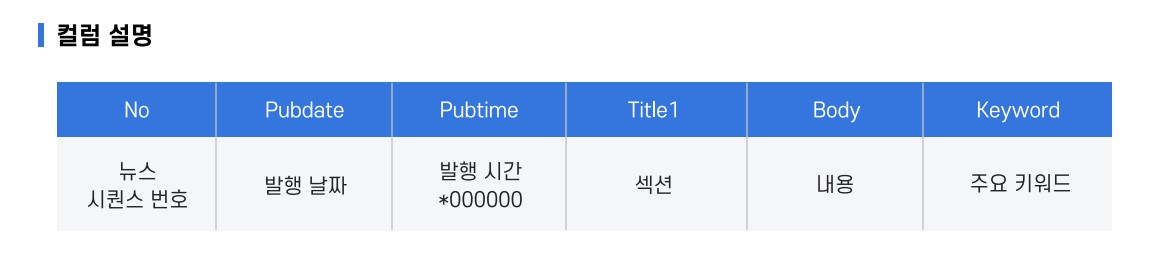

In [8]:
mk_news = pd.read_excel('mk_news_201901_202006.xlsx')
mk_news

,no,pubdate,pubtime,title1,body,keywords
0,2304119,20200312,0.0,사회일반,NaN,NaN
1,3937779,20190112,0.0,출판/도서,<!--[[--image0--]]//--> ◆ 야바위 게임 / 마이클 슈월비 지음...,"신간,소개"
2,3953320,20190101,0.0,테마기획,◆ 2019 경제기상도 / 부동산 ◆ \n <!--[[--image0--]]//--...,"ㅈ,ㅈ"
3,3953321,20190101,0.0,테마기획,◆ 2019 경제기상도 / 금리 ◆ \n <!--[[--image0--]]//-->...,"금리,경제기상도"
4,3953324,20190101,0.0,테마기획,<!--[[--image0--]]//--> '황금돼지해'인 2019년 기해년(己亥...,"경제,성장,경제기상도"
...,...,...,...,...,...,...
316819,4541564,20200630,225757.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN
316820,4541571,20200630,230932.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN
316821,4541579,20200630,231823.0,방송/TV,<!--[[--image0--]]//--> [매일경제 스타투데이 허은경 객원기자]...,NaN
316822,4541586,20200630,232907.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN


In [9]:
mk = mk_news.copy()

mk.columns

Index(['no', 'pubdate', 'pubtime', 'title1', 'body', 'keywords'], dtype='object')

In [10]:
#내용 중복 제거
new_mk = mk.drop_duplicates(['title1','body'], keep='first', ignore_index = True)
len(new_mk)

297623

In [11]:
#title1에 있는 카테고리는 총 174개
new_mk['title1'].unique()

array(['사회일반', '출판/도서', '테마기획', '의약/건강', '중견/중소기업', '증권계동향', '노동/노사',
       '경제일반', '문화산업', '공연/전시/음악', '신문/방송', '바둑', '기자24시', '매경칼럼', '사외칼럼',
       '인물/인터뷰', '인사', '사설', '아파트/분양', '신도시/토지', '유통·섬유·음식료', '외환·환율',
       '금융정책·일반', '카드·캐피털', '과학기술/특허', '사고/알림', '경기/지표', '정치일반', '해외증시',
       '채권/펀드', '국제금융', '국제경제', '국제산업', '국제정치', '항공·해운', '자동차', '기업 경영',
       '축구', '골프', '레저/관광', '기업정보', '남북관계', '외교·국방', '시세/시황', '법원·검찰·경찰',
       '교통/환경/날씨', '카툰', '핫이슈', '방송/TV', '가요', '사건·사고', '기타', '야구',
       '컴퓨터/정보통신', '무역/통상', nan, '세금', '국제사회', '전기·전자·통신', '국제사건/사고',
       'Economy', '헬스저널', '기업일반·재계동향', '교육', '건설업계 동향', '보건/복지', 'Seoul',
       '스포츠(기타)', '중공업·기계·금속', '지역경제', '부음', '행정·지자체', '취업/채용', '공시',
       '은행', '상가/오피스텔', '보험', '시황', '칼럼', '창업', 'Asia', 'Market',
       'CONSUMER JOURNAL', '저축은행·기타', '포토', 'Biz', '세제/정책', '화학·에너지',
       'Cover Story', 'Review&Observation', 'Photos', '벤쳐/벤쳐캐피탈',
       '재개발/재건축', '증권정책', '당좌거래 정지', '영화', 'THE BIZ TIMES',
       'Money & Rich

In [12]:
new_mk.isnull().sum()

no               0
pubdate          0
pubtime          1
title1        9541
body             2
keywords    141268
dtype: int64

### 데이터 정제

In [13]:
#body의 1번째에 해당하는 값을 300자까지 출력
example = new_mk['body'][1][:300]
type(example)

str

In [14]:
import re
example1 = re.sub('[^ㄱ-힣A-Z]',' ',example )
example1

'                           야바위 게임   마이클 슈월비 지음   노정태 옮김    만    원  도덕의 문제로 불평등의 심각함을 말할 수 있다고 주장하는 책  슈월비는 불평등 구조를 유지하며 도덕과 부의 문제를 일으키는  있는 자 들의  가지 기본 법칙을 소개한다  문예출판사 펴냄    직장인의 바른 습관   문성후 지음    만    원 주   시간 근무제라는 새로운 업무 환경에 직면한 직장인들의 일과 삶에 꼭 필요한 습관을 담은 직장 생활 지침서다  이지퍼블리싱 펴냄    마취의 시대   로랑 드 쉬테르 '

In [15]:
pd.options.mode.chained_assignment = None

In [16]:
#모든 body에 대해 정규화 진행
news_sub = []

for i in range(len(new_mk)):
  news_sub.append(re.sub('[^ㄱ-힣A-Z]',' ', str(new_mk['body'][i])))

new_mk['정규화'] = news_sub

In [17]:
len(news_sub)

297623

In [18]:
new_mk['정규화'][2]

'       경제기상도   부동산                                 년 부동산 시장은 롤러코스터를 타듯 요동친 한 해였다  서울 공급량 부족이  년 내내 이어졌고 서울의 거침없는 집값 상승으로 종합 부동산 대책이 쉴 틈 없이 쏟아져 나왔다  급등과 숨 고르기를 거듭한 부동산 시장은 미국과 한국의 연이은 금리 인상과 규제 일변도 정부 정책과 맞물려 연말 들어 하락세를 이어가고 있다      년에는 다주택자를 중심으로 강화된 세금 규제  대출금리 인상 가능성  투기 수요 차단을 위한 대출 규제 강화 등 여러 악재가 겹겹이 대기하며 주택 시장을 위협하고 있다  이로 인해     년 아파트 시장은 한동안 냉각기가 이어질 가능성이 크다   반면 분양 시장은   월   일부터 시행된 청약제도 개편 영향으로 무주택자의 당첨 기회가 늘어났다  따라서 내 집 마련을 위한 청약 열기는     년 더욱 뜨거워질 전망이다  분양가 상한제 시행으로 주변보다  억  억원씩 저렴한 신규 아파트가 다수 공급되는 만큼 인기 지역과 유망 단지는 꾸준한 인기가 예상된다  함영진 직방 빅데이터랩장은  서울은 약하게 보합세를 유지할 반면 지방은 가격 하락으로 인한 시장 붕괴 가능성도 있다 고 밝혔다       년 새 아파트 분양 물량은 약   만    가구로 추정되고 있다  이는 최근  년간 평균 분양 실적보다    가량 높은 수치로 공급량 확대가 시장 전반에 미칠 영향에 관심이 쏠리고 있다  최근 부동산   가 발표한     년 부동산 분양 계획에 따르면 전국    개 사업장에서 총   만    가구가 분양될 예정이다           년 평균 분양 물량   만    가구 보다       증가한 수치다    만    가구에 그친     년 대비     증가한다      년 초 건설사들이 내놓은 분양 물량 계획은   만    가구였다  하지만 정부의 부동산 규제가 강화되면서 결국 연초 예상치의    에 불과한   만가구 분양에 그친 바 있다  결국     년도 분양 누락분

### 필요베이스 설치

In [19]:
#!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [20]:
#%cd Mecab-ko-for-Google-Colab/

In [21]:
#!bash install_mecab-ko_on_colab190912.sh

#### 토큰화

In [22]:
kkma_tokens = kkma.morphs(new_mk['정규화'][2])
kkma_tokens

['경제',
 '기상도',
 '부동산',
 '년',
 '부동산',
 '시장',
 '은',
 '롤러',
 '코스터',
 '를',
 '타',
 '듯',
 '요동치',
 'ㄴ',
 '한',
 '해',
 '이',
 '었',
 '다',
 '서울',
 '공급량',
 '부족',
 '이',
 '년',
 '내내',
 '이어지',
 '었',
 '고',
 '서울',
 '의',
 '거침없',
 '는',
 '집값',
 '상승',
 '으로',
 '종합',
 '부동산',
 '대책',
 '이',
 '쉬',
 'ㄹ',
 '틈',
 '없이',
 '쏟아지',
 '어',
 '나오',
 '았',
 '다',
 '급등',
 '과',
 '숨',
 '고르',
 '기',
 '를',
 '거듭',
 '하',
 'ㄴ',
 '부동산',
 '시장',
 '은',
 '미국',
 '과',
 '한국',
 '의',
 '연잇',
 '은',
 '금리',
 '인상',
 '과',
 '규제',
 '일변도',
 '정부',
 '정책',
 '과',
 '맞물리',
 '어',
 '연말',
 '듣',
 '어',
 '하락세',
 '를',
 '잇',
 '어',
 '가',
 '고',
 '있',
 '다',
 '년',
 '에',
 '는',
 '다',
 '주택자',
 '를',
 '중심',
 '으로',
 '강화',
 '되',
 'ㄴ',
 '세금',
 '규제',
 '대출',
 '금리',
 '인상',
 '가능성',
 '투기',
 '수요',
 '차단',
 '을',
 '위하',
 'ㄴ',
 '대출',
 '규제',
 '강화',
 '등',
 '여러',
 '악재',
 '가',
 '겹겹이',
 '대기',
 '하',
 '며',
 '주택',
 '시장',
 '을',
 '위협',
 '하',
 '고',
 '있',
 '다',
 '이',
 '로',
 '인하',
 '어',
 '녀',
 'ㄴ',
 '아파트',
 '시장',
 '은',
 '한동안',
 '냉각기',
 '가',
 '이어지',
 'ㄹ',
 '가능성',
 '이',
 '크',
 '다',
 '반면',
 '분양',
 '시장',
 '은

In [23]:
#품사부착
kkmaTag = []
for token in kkma_tokens:
  kkmaTag += kkma.pos(token)

kkmaTag

[('경제', 'NNG'),
 ('기상도', 'NNG'),
 ('부동산', 'NNG'),
 ('년', 'NNG'),
 ('부동산', 'NNG'),
 ('시장', 'NNG'),
 ('은', 'NNG'),
 ('롤러', 'NNG'),
 ('코스터', 'NNG'),
 ('를', 'UN'),
 ('타', 'NNG'),
 ('듯', 'NNB'),
 ('요동치', 'VV'),
 ('ㄴ', 'NNG'),
 ('한', 'NNG'),
 ('해', 'NNG'),
 ('이', 'NNG'),
 ('어', 'VV'),
 ('었', 'EPT'),
 ('다', 'NNG'),
 ('서울', 'NNG'),
 ('공급량', 'NNG'),
 ('부족', 'NNG'),
 ('이', 'NNG'),
 ('년', 'NNG'),
 ('내내', 'MAG'),
 ('이어지', 'VV'),
 ('어', 'VV'),
 ('었', 'EPT'),
 ('고', 'NNG'),
 ('서울', 'NNG'),
 ('의', 'NNG'),
 ('거침없', 'VA'),
 ('늘', 'VA'),
 ('ㄴ', 'ETD'),
 ('집값', 'NNG'),
 ('상승', 'NNG'),
 ('으', 'UN'),
 ('로', 'JKM'),
 ('종합', 'NNG'),
 ('부동산', 'NNG'),
 ('대책', 'NNG'),
 ('이', 'NNG'),
 ('쉬', 'NNG'),
 ('ㄹ', 'NNG'),
 ('틈', 'NNG'),
 ('없이', 'MAG'),
 ('쏟아지', 'VV'),
 ('어', 'NNG'),
 ('나오', 'VV'),
 ('아', 'VV'),
 ('었', 'EPT'),
 ('다', 'NNG'),
 ('급등', 'NNG'),
 ('과', 'NNG'),
 ('숨', 'NNG'),
 ('고르', 'VV'),
 ('기', 'NNG'),
 ('를', 'UN'),
 ('거들', 'VV'),
 ('하', 'NNG'),
 ('ㄴ', 'NNG'),
 ('부동산', 'NNG'),
 ('시장', 'NNG'),
 ('은', 'NNG'),


In [24]:
#불용어 처리

from collections import Counter as counter

counter(kkmaTag).most_common()

[(('이', 'NNG'), 43),
 (('ㄴ', 'NNG'), 40),
 (('다', 'NNG'), 31),
 (('은', 'NNG'), 29),
 (('되', 'VA'), 27),
 (('늘', 'VA'), 24),
 (('ㄴ', 'ETD'), 24),
 (('하', 'NNG'), 24),
 (('가', 'NNG'), 22),
 (('가구', 'NNG'), 21),
 (('의', 'NNG'), 20),
 (('에', 'VV'), 19),
 (('분양', 'NNG'), 19),
 (('로', 'NNG'), 18),
 (('시장', 'NNG'), 17),
 (('만', 'NNG'), 17),
 (('ㄹ', 'NNG'), 16),
 (('었', 'EPT'), 15),
 (('으', 'UN'), 15),
 (('로', 'JKM'), 15),
 (('어', 'NNG'), 14),
 (('부동산', 'NNG'), 13),
 (('어', 'VV'), 13),
 (('ㄴ다', 'UN'), 13),
 (('물량', 'NNG'), 12),
 (('를', 'UN'), 10),
 (('고', 'NNG'), 10),
 (('주택', 'NNG'), 10),
 (('년', 'NNG'), 9),
 (('주택자', 'NNG'), 9),
 (('녀', 'NNG'), 8),
 (('청약', 'NNG'), 8),
 (('무', 'NNG'), 8),
 (('서울', 'NNG'), 7),
 (('가장', 'MAG'), 7),
 (('과', 'NNG'), 6),
 (('을', 'NNG'), 6),
 (('전망', 'NNG'), 6),
 (('공급', 'NNG'), 6),
 (('면', 'NNG'), 6),
 (('많', 'VA'), 6),
 (('보유자', 'NNG'), 6),
 (('규제', 'NNG'), 5),
 (('있', 'VA'), 5),
 (('가능성', 'NNG'), 5),
 (('며', 'UN'), 5),
 (('인하', 'VV'), 5),
 (('기회', 'NNG'), 5),
 

In [25]:
# kkma_tokens = []

# for i in range(len(new_mk)):
#   kkma.morphs(new_mk['정규화'][i])